In [1]:
#finc ships here: https://conwaylife.com/ref/lexicon/lex_1.htm

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [2]:
# constants

cells_width = 100
cells_height = 100
on_value = 234
off_value = 23

In [3]:
# initialize game level

game_level = np.random.choice(
    [on_value, off_value], 
    cells_width * cells_height, 
    p=[0.0, 1.0]).reshape([cells_width, cells_height])


In [4]:

def add_ship(ship_data, position):
    for i, line in enumerate(ship_data):
        for j, cell in enumerate(line):
            game_level[i + position[0]][j + position[1]] = ship_data[i][j]
            
def ship_character_to_value(input):
    if input == ".":
        return off_value
    if input == 'O':
        return on_value
    
def ship_to_ship_data(ship):
    lines = ship.splitlines()
    ship_data = np.zeros([len(lines), len(list(lines[0]))], dtype=np.uintc)
    for i, line in enumerate(lines):
        for j, char in enumerate(list(line)):
            ship_data[i][j] = ship_character_to_value(char)
    return ship_data

In [9]:
#this cell adds a ship to the game level

ship = """....................OO.
....................OO.
...................O..O
................OO.O..O
......................O
..............OO...O..O
..............OO.....O.
...............O.OOOOO.
................O......
.......................
.......................
.............OOO.......
.............O.........
...........OO..........
.....OO....O...........
.....OOO...O...........
...O....O..............
...O...O...............
.......O...............
..OO.O.O...............
OO.....O...............
OO....OO...............
..OOOO................."""

    
add_ship(ship_data=ship_to_ship_data(ship), position=[10,10])

<IPython.core.display.Javascript object>


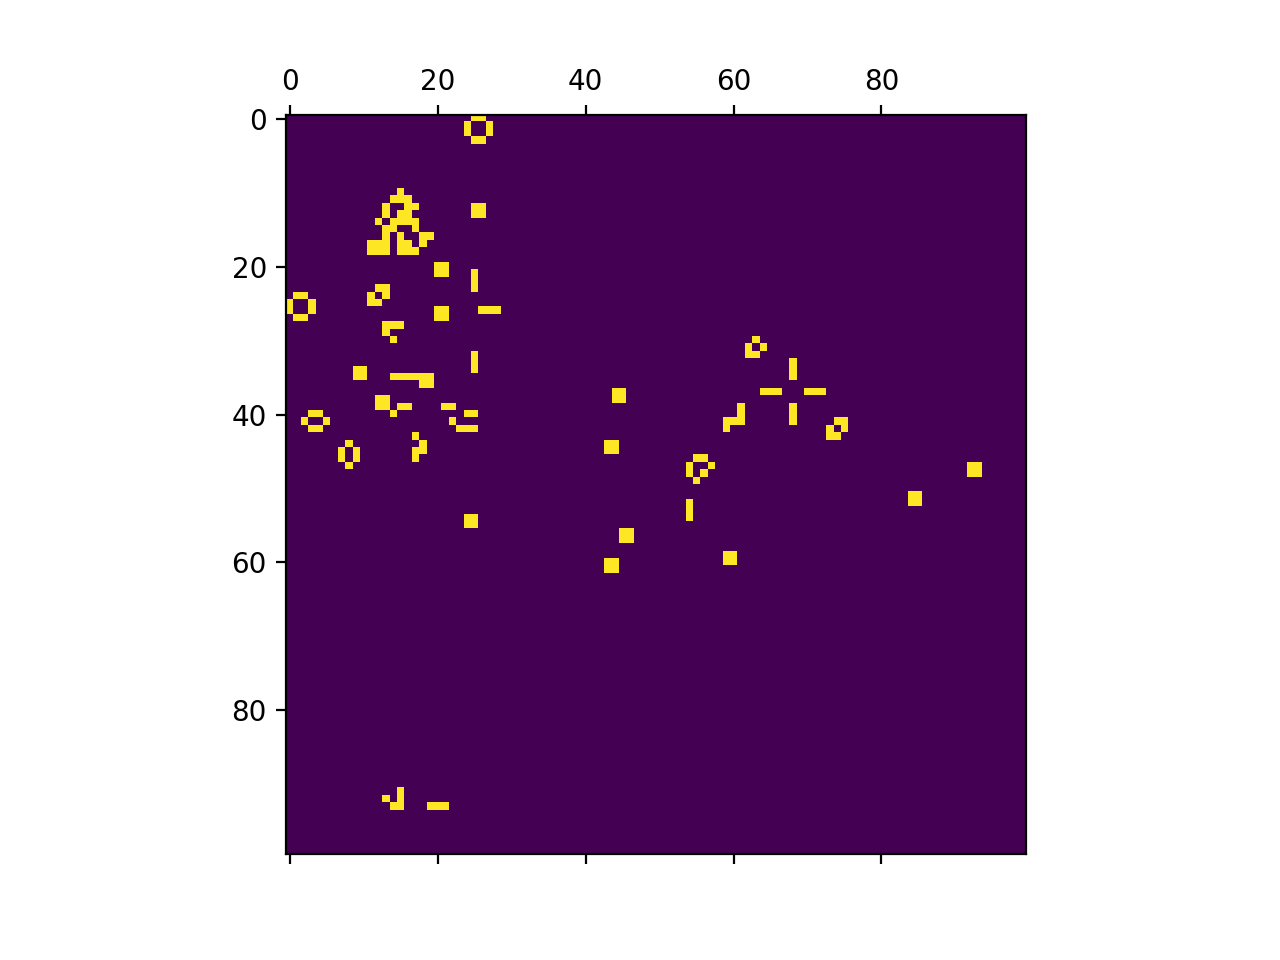

In [10]:
%matplotlib notebook
%matplotlib notebook

#from the web -> inject values onto other variable names
grid = game_level
N = cells_width
ON = on_value
OFF = off_value

#
def update(data):
  global grid
  # copy grid since we require 8 neighbors for calculation
  # and we go line by line 
  newGrid = grid.copy()
  for i in range(N):
    for j in range(N):
      # compute 8-neghbor sum 
      # using toroidal boundary conditions - x and y wrap around 
      # so that the simulaton takes place on a toroidal surface.
      total = (grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
               grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
               grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
               grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255
      # apply Conway's rules
      if grid[i, j]  == ON:
        if (total < 2) or (total > 3):
          newGrid[i, j] = OFF
      else:
        if total == 3:
          newGrid[i, j] = ON
  # update data
  mat.set_data(newGrid)
  grid = newGrid
  return [mat]

# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(grid)
ani = animation.FuncAnimation(fig, update, interval=50,
                              save_count=50)
plt.show()